<a href="https://colab.research.google.com/github/nyamskamau/Advertisment-Analysis/blob/main/Adverts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project Week 12


## Defining the Question

To identify the individuals that are more likely to click on the ads.

## The Metric for Success

To provide an accurate picture of the people most likely to view the clients advertisements and provide recommendations to the client based on the results of this analysis.

## The Context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads

## The Experimental Design Taken

For this analysis I first loaded the dataset provided , previewed the dataset and carried out data cleaning. Next I checked for anomalies and outliers in the dataset and dealt with these. Finally I carried out Univariate and Bivariate analysis and provided insights and recommendations to the client based on my findings.

## Appropriateness of the data

Given the task at hand the data provided is appropriate to carry out this analysis.

## Importing the Dataset and the Appropriate Libraries

In [10]:
# I loaded the appropriate libraries to be used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

In [11]:
# I imported the dataset
ads = pd.read_csv('advertising.csv')

In [12]:
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
ads.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


I then checked for the data types of the columns in the dataset. The dataset had 1,000 rows and 10 columns , with three being of type character , one of type datetime and the others being numeric. The Numeric variables had four continuous and two categorical variables.

In [14]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


The descriptions of these columns was as follows:

1. ‘Daily Time Spent on Site’: consumer time on site in minutes
2. ‘Age’: customer age in years
3. Area Income’: Avg. Income of geographical area of consumer
4. ‘Daily Internet Usage’: Avg. minutes a day consumer is on the internet
5. ‘Ad Topic Line’: Headline of the advertisement
6. ‘City’: City of consumer
7. ‘Male’: Whether or not consumer was male
8. ‘Country’: Country of consumer
9. ‘Timestamp’: Time at which consumer clicked on Ad or closed window
10. ‘Clicked on Ad’: 0 or 1 indicated clicking on Ad

## Data Cleaning

In [15]:
ads.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [16]:
ads.duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Data Analysis

In [26]:
cont = ads[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
cont.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


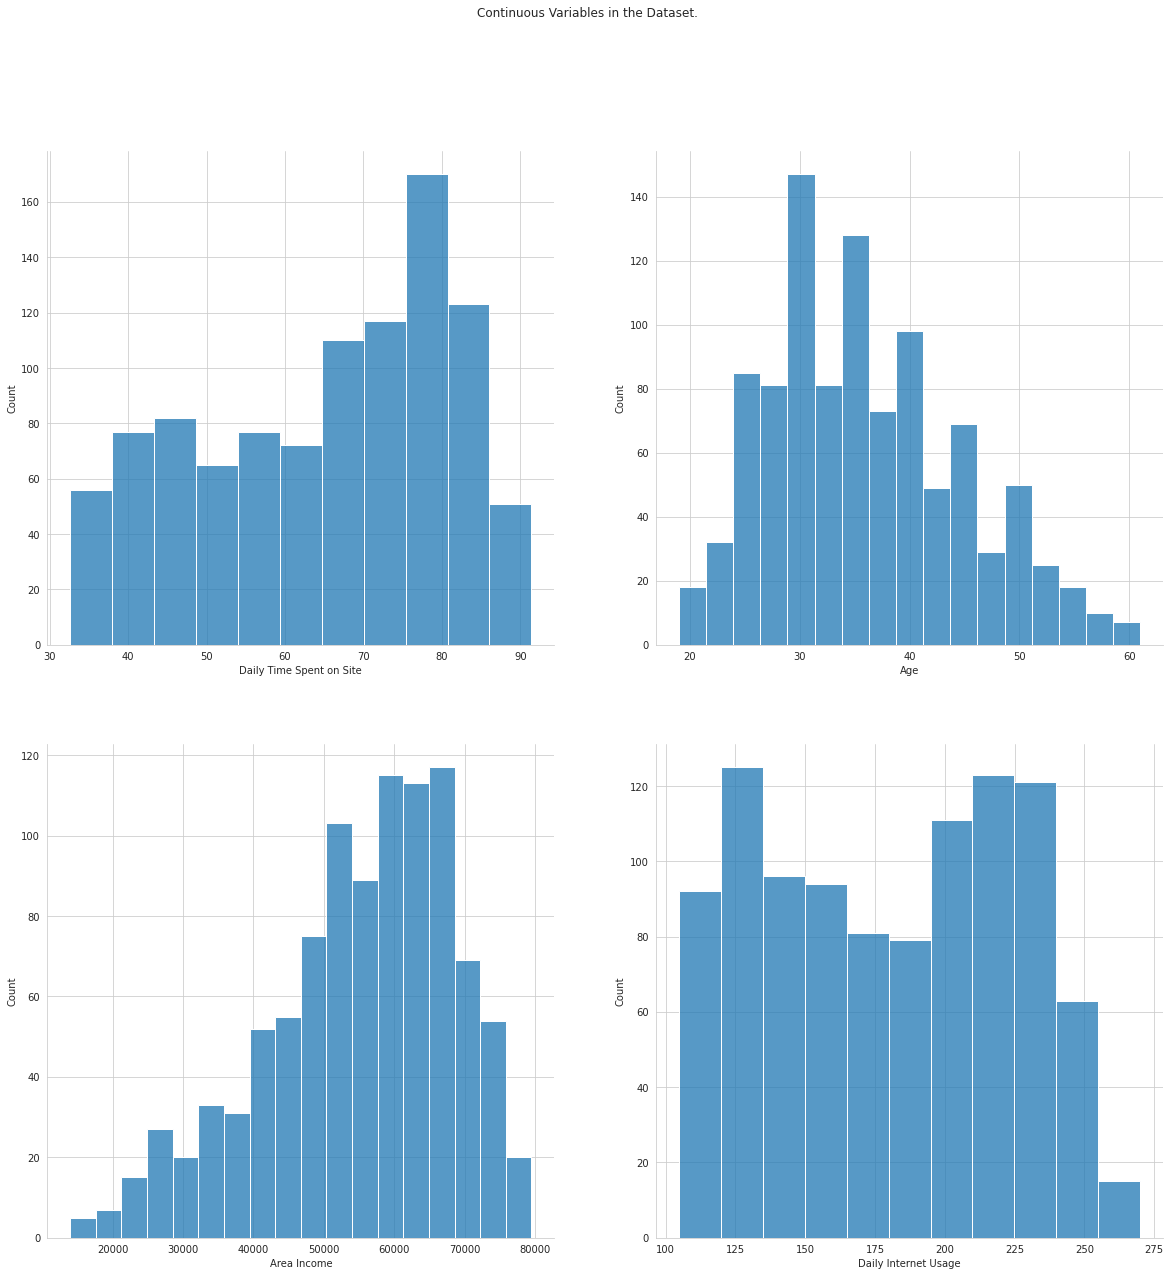

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.color_palette("mako")
fig.suptitle('Continuous Variables in the Dataset.')
sns.histplot(ax=axes[0, 0], data=ads, x='Daily Time Spent on Site')
sns.histplot(ax=axes[0, 1], data=ads, x='Age')
sns.histplot(ax=axes[1, 0], data=ads, x='Area Income')
sns.histplot(ax=axes[1, 1], data=ads, x='Daily Internet Usage')
sns.despine()


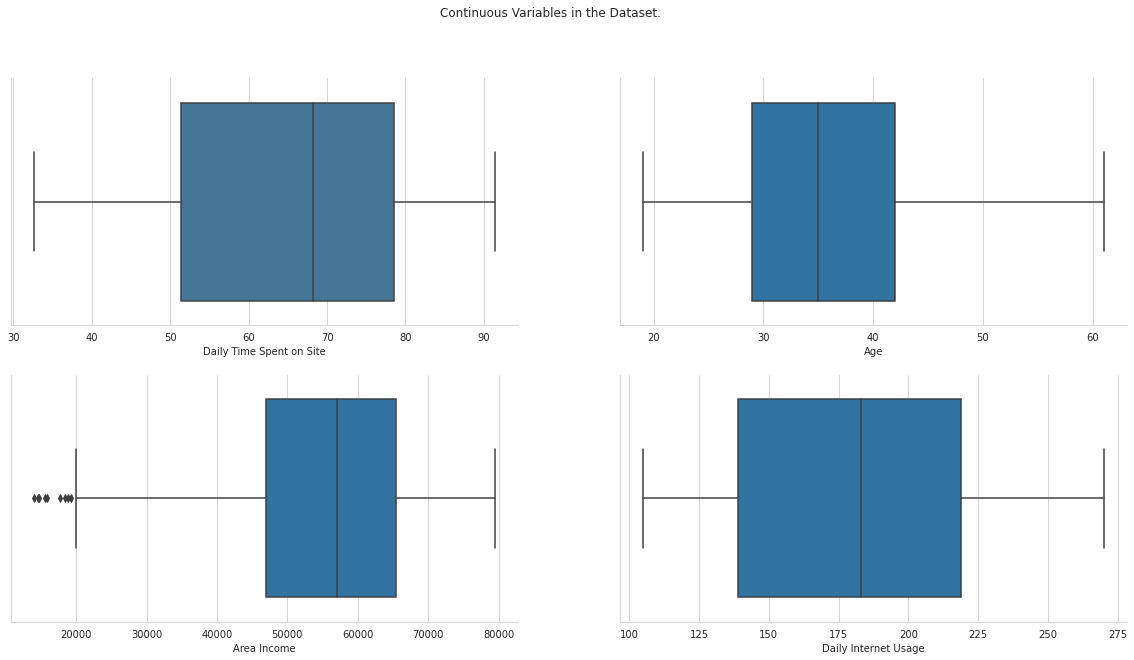

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.color_palette("mako")
fig.suptitle('Continuous Variables in the Dataset.')
sns.boxplot(ax=axes[0, 0], data=ads, x='Daily Time Spent on Site')
sns.boxplot(ax=axes[0, 1], data=ads, x='Age')
sns.boxplot(ax=axes[1, 0], data=ads, x='Area Income')
sns.boxplot(ax=axes[1, 1], data=ads, x='Daily Internet Usage')
sns.despine()

**1.From the Daily Time Spent on Site column:**

* The mean amount of time that users spent on the site was 65 minutes while the maximum amount of time a user spent on the site was 91.43 minutes.
* The Variance of the column was 251.3371 with a standard deviation of 15.85361.
* The data was negatively but fairly symmetrical with a value of -0.3712026 and the distribution can be categorized as platykurtic with a kurtosis value of 1.903942
* Furthermore plotting a boxplot of the variable I observed that it didnot have any outliers .
* Plotting a histogram for the column we can see that approxiamtely 125 users spent over 80 minutes daily on the site , and many users spent over 60 minutes on the site daily.

**2.From the Age Column**

* The mean age of the consumers was 36.01 while the median age was 35 and the modal age was 31.
* The variable was positively skewed and fairly symmetrical with a skew value of 0.4777052 , the distribution was platykurtic with a kurtosis value of 2.595482
* The age of the consumers ranged between 19 and 61 , with majority of the users ranging between 30 and 45. The interquartile age for the upper and lower quartile was 13.
The were no outliers in this column as observed from the boxplot.


**3.From the Area Income column:**

* The median income of the users was 57,012 while the mean income was 55,000 and the modal income was 61,833.9.
* The income of the site users ranged from 13,996 to 79,485 , with the interquarile range being 18483.83.
* The data had a negative skew and was moderately skewed with a value of -0.6484229, the data had a platykurtic distribution with a value of 2.894694.
* There were several outliers in the column , on the lower side of the income earned however I did not drop these from my dataset as they were a true representation of the population.

**4.From the Daily Internet Usage:**

* The Average Hours spent by users on the Internet is 180 minutes while the median is 183.1 and the mode is 167.22.
* The Interquartile Range is 79.9625.
* The data is negatively but fairly skewed with a skew value of -0.03343681 and the data is platykurtic with a value of 1.727701
* There were no outliers in this column as observed in the boxplot plotted for this column.


### Bivariate Data Analysis

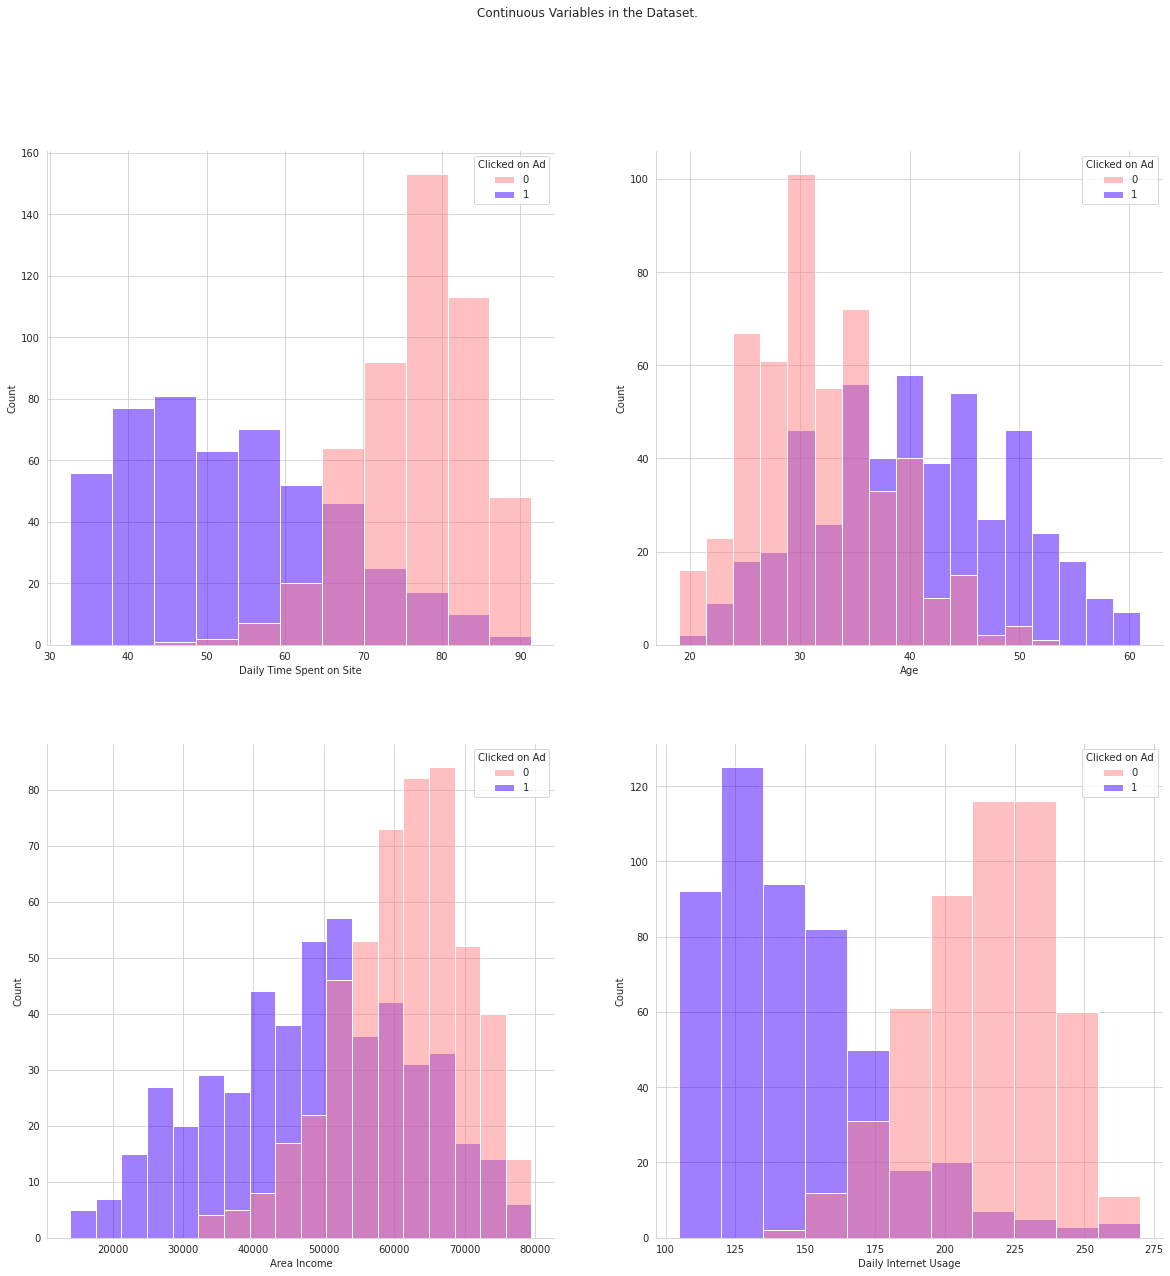

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Continuous Variables in the Dataset.')
sns.histplot(ax=axes[0, 0], data=ads, x='Daily Time Spent on Site',hue= 'Clicked on Ad',palette='gnuplot2_r')
sns.histplot(ax=axes[0, 1], data=ads, x='Age',hue= 'Clicked on Ad' ,palette='gnuplot2_r')
sns.histplot(ax=axes[1, 0], data=ads, x='Area Income' ,hue= 'Clicked on Ad',palette='gnuplot2_r')
sns.histplot(ax=axes[1, 1], data=ads, x='Daily Internet Usage' ,hue= 'Clicked on Ad',palette='gnuplot2_r')
sns.despine()
